<a href="https://colab.research.google.com/github/Vedu-Singh/Data-Science/blob/main/ML_ClassificationDTree_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** Decision-Tree / DTree-Classifier in Machine Learning For Classification Problem - Wine Dataset contd.----> **

In [9]:
#import all the necessary libraries --->

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/bipulshahi/Dataset/main/wine.csv')
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [10]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [11]:
# perform train-test split -->
from sklearn.model_selection import train_test_split
X = df.drop('Target', axis='columns')
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
xtrainScaled = scaler.fit_transform(X_train)
xtestScaled = scaler.transform(X_test)

In [38]:
from sklearn.tree import DecisionTreeClassifier
# some factors are there --> limiting criteria's in Dtree_Classifier to avoid overfitting condition using IG,GI,and entropy and many more factors ...
# 1.> model = DecisionTreeClassifier(max_depth=2)
# 2.> model = DecisionTreeClassifier(max_leaf_nodes=4)
# 3.> model = DecisionTreeClassifier(max_samples_split=15)
# other best score criteria --> using entropy -->
# 4.> model = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5)
# model = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5)
model = DecisionTreeClassifier(min_samples_split=15 , criterion='entropy')
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=15)

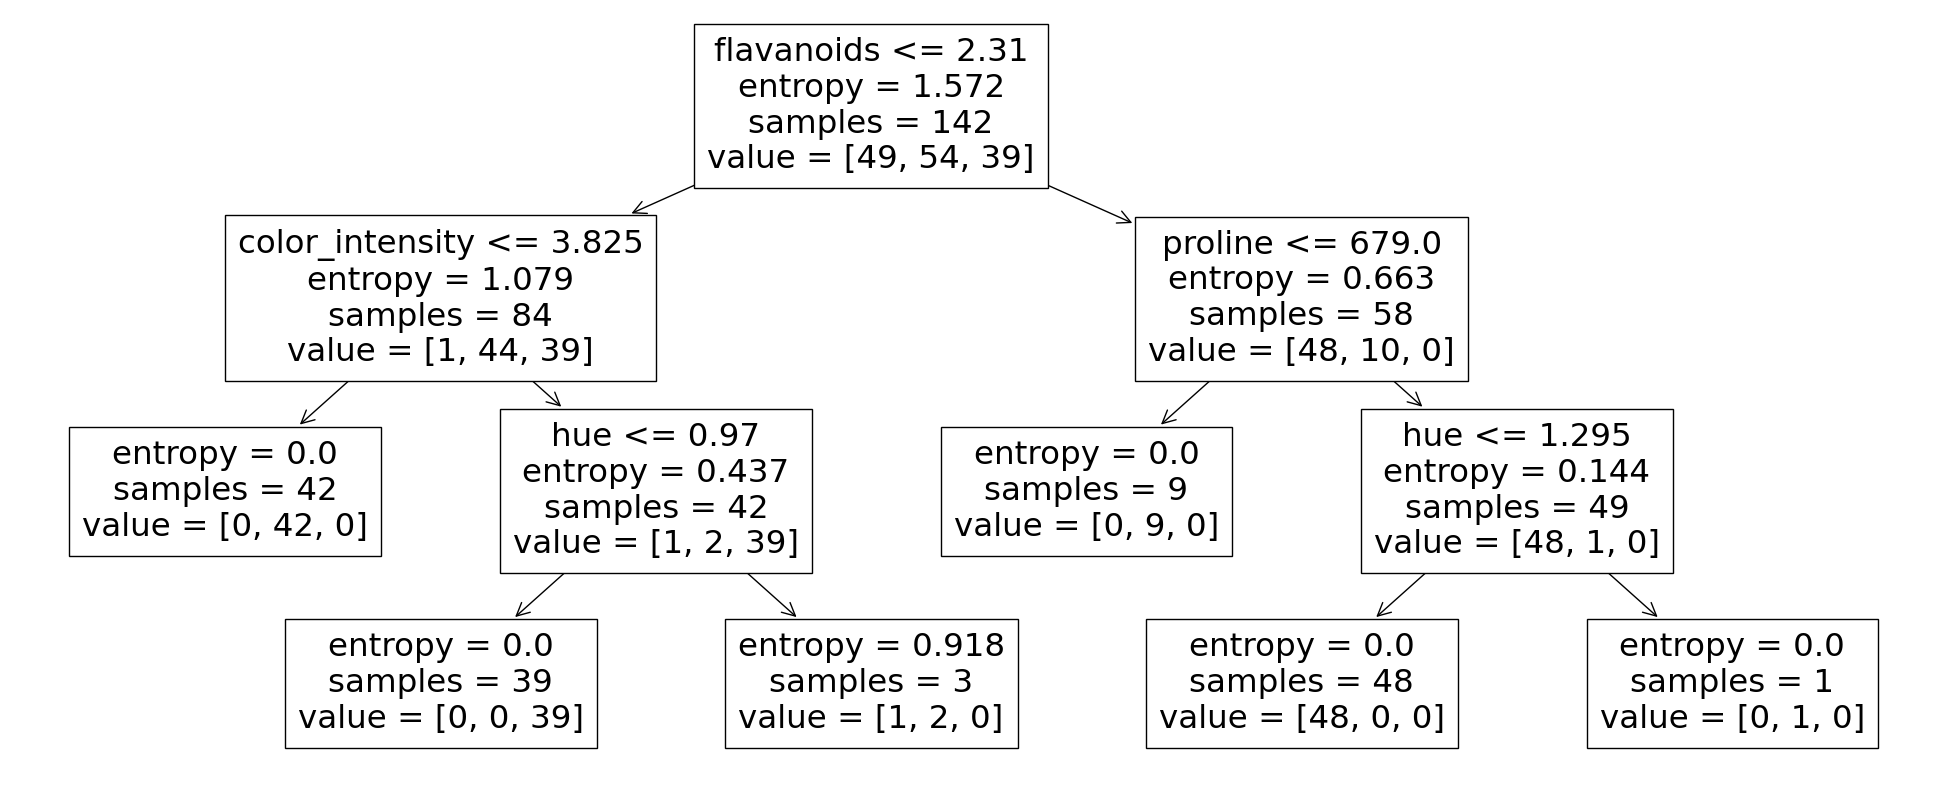

In [39]:
from sklearn import tree
plt.figure(figsize=(25,10))                     # here x[12] & so,on are columns names --->
tree.plot_tree(model , feature_names= X_train.columns)
plt.show()

In [40]:
print(model.score(X_test, y_test))
print(model.score(X_train, y_train))

0.9166666666666666
0.9929577464788732
